WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 19 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.695  0.044   0.611    0.777      0.001    0.001    3266.0    5157.0   

   r_hat  
p    1.0

<Figure size 1152x576 with 0 Axes>

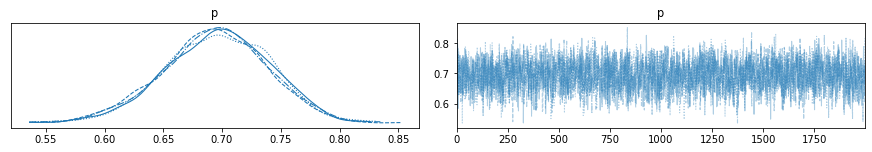

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC653CA3D0>,
      dtype=object)

In [1]:
import pymc3 as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize=(16,8))
warnings.simplefilter(action="ignore", category=FutureWarning)
occurrences = np.array([1] * 70 + [0] * 30)

with pm.Model() as model:
    p = pm.Uniform("p", lower=0, upper=1)
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    idata = pm.sample(2000, tune=2500)
    display(az.summary(idata))
az.plot_trace(idata, show=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p]


Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 36 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p          0.696  0.046   0.605    0.778      0.001    0.000    7313.0   
p_control  0.499  0.049   0.411    0.593      0.001    0.000    6740.0   
diff       0.197  0.067   0.071    0.321      0.001    0.001    7095.0   

           ess_tail  r_hat  
p            5283.0    1.0  
p_control    5668.0    1.0  
diff         5973.0    1.0

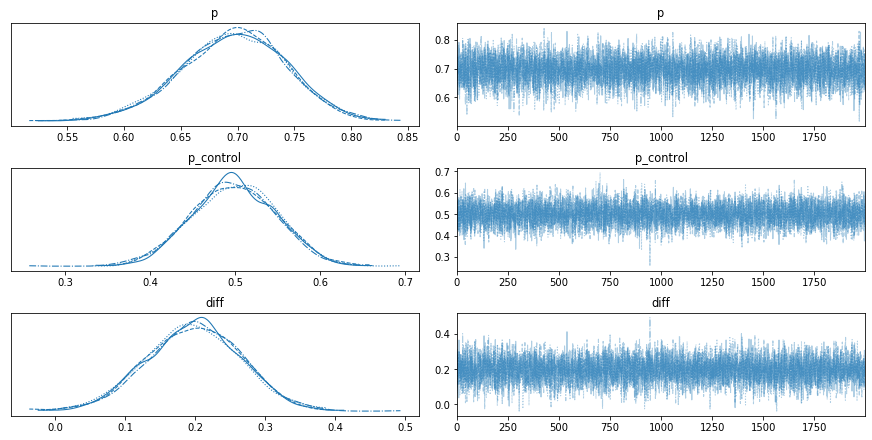

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC655776A0>,
      dtype=object)

In [2]:
occurrences = np.array([1] * 70 + [0] * 30)
placebo = np.array([1] * 50 + [0] * 50)
with pm.Model() as model:
    p = pm.Uniform("p", lower=0, upper=1)
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    p_control = pm.Uniform("p_control", lower=0, upper=1)
    control = pm.Bernoulli("control", p_control, observed=placebo)
    diff = pm.Deterministic("diff", p-p_control)
    idata = pm.sample(2000, tune=2500)
    display(az.summary(idata))
az.plot_trace(idata, show=True)

In [3]:
occurrences = np.array([1] * 700 + [0] * 300)
placebo = np.array([1] * 500 + [0] * 500)
with pm.Model() as model:
    p = pm.Uniform("p", lower=0, upper=1)
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    p_control = pm.Uniform("p_control", lower=0, upper=1)
    control = pm.Bernoulli("control", p_control, observed=placebo)
    diff = pm.Deterministic("diff", p-p_control)
    idata = pm.sample(2000, tune=2500)
    display(az.summary(idata))
az.plot_trace(idata, show=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p]


Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 120 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p          0.699  0.015   0.670    0.726        0.0      0.0    7026.0   
p_control  0.500  0.016   0.471    0.530        0.0      0.0    7363.0   
diff       0.200  0.021   0.159    0.239        0.0      0.0    7289.0   

           ess_tail  r_hat  
p            5625.0    1.0  
p_control    5500.0    1.0  
diff         6294.0    1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC682CB340>,
      dtype=object)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p]


Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 73 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p          0.667  0.132   0.427    0.903      0.002    0.001    6820.0   
p_control  0.500  0.016   0.471    0.530      0.000    0.000    6568.0   
diff       0.167  0.133  -0.085    0.398      0.002    0.001    6785.0   

           ess_tail  r_hat  
p            4853.0    1.0  
p_control    5313.0    1.0  
diff         5032.0    1.0

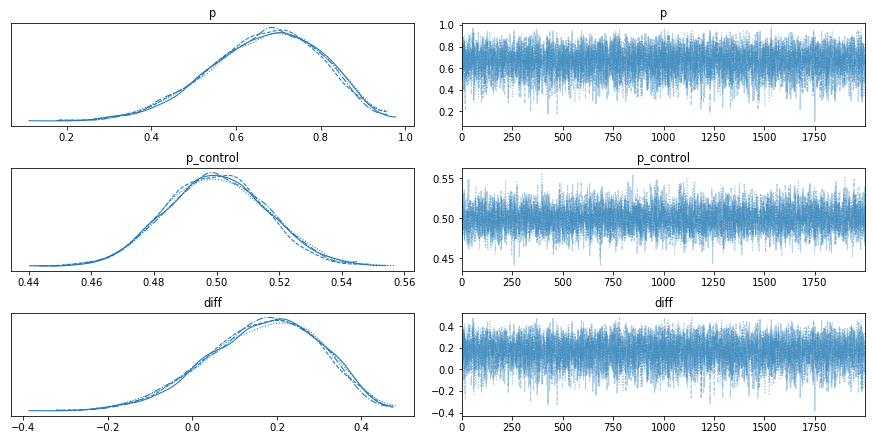

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC67295550>,
      dtype=object)

In [4]:
occurrences = np.array([1] * 7 + [0] * 3)
placebo = np.array([1] * 500 + [0] * 500)
with pm.Model() as model:
    p = pm.Uniform("p", lower=0, upper=1)
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    p_control = pm.Uniform("p_control", lower=0, upper=1)
    control = pm.Bernoulli("control", p_control, observed=placebo)
    diff = pm.Deterministic("diff", p-p_control)
    idata = pm.sample(2000, tune=2500)
    display(az.summary(idata))
az.plot_trace(idata, show=True)

# Conclusions

From different sample sizes we can see the change in the distribution shape. As the number of samples increases, the distribution shape changes from skewed to symmetrical. We can see that the distribution of occurence group (p) for 10 samples is much more skewed and wider, while the one with 1000 samples is symmetrical and narrow.

The distributions with low number of samples are subject to a high degree of uncertainty. Standard deviation for occurence group (p) with n = 10 samples is 0.132, whereas for the placebo group (p_control) for n = 1000 samples is much smaller, equal to 0.016. 

For this configuration of occurence group (p) with n = 10 and placebo group (p_control) with n = 1000, the difference of their distributions can reach negative numbers. This would mean that there is a possibility of placebo treatment being more effective, and the drug being actually harmful, which cannot be percieved from just 10 samples. 

In conclusion, the higher nubmer of samples allows us to estimate the underlying distribution more accurately and with higher confidence. In this particular example, we can see that one cannot judge the distribution based on only 10 samples, and we should aim to have at least 1000 samples, and to keep their relative sizes the same to accurately gauge the underlying process.
